In [38]:

import pandas as pd
import pickle
from universal import *
import matplotlib.ticker as mticker
import matplotlib as mpl
from datetime import datetime



In [39]:
name_data = 'discharge'

# -----------------------------------------------------------------------------  

# See data from station
info_stations = pd.read_csv('Documents/porto_alegre_stations_wwhoutid.csv')

print(info_stations)

# Specify the directory path
hist_folder_path = f'Historic_{name_data}'
telem_folder_path = 'Telemetricas'

# for index, code in enumerate(info_stations['Code']):


    Priority                         Name          River      Code      Lat  \
0          1                 CAIS MAUÁ C6     RIO GUAÍBA  87450004 -30.0211   
1          2                      TRIUNFO      RIO JACUÍ  87010000 -29.9419   
2          2             PASSO MONTENEGRO        RIO CAÍ  87270000 -29.7011   
3          2                 SÃO LEOPOLDO  RIO DOS SINOS  87382000 -29.7589   
4          2                      TAQUARI    RIO TAQUARI  86950000 -29.8069   
5          2              CORSAN ALVORADA   RIO GRAVATAÍ  87401750 -29.9683   
6          3                    RIO PARDO      RIO JACUÍ  85900000 -29.9950   
7          3                 NOVA PALMIRA        RIO CAÍ  87160000 -29.3355   
8          3                    CAMPO BOM  RIO DOS SINOS  87380000 -29.6917   
9          3  PASSO DAS CANOAS - AUXILIAR   RIO GRAVATAÍ  87399000 -29.9644   
10         3               PORTO MARIANTE    RIO TAQUARI  86895000 -29.6922   

        Lon               City  WWHOUTID  reach_ids

In [40]:

# Set station of interest manually
index_ = 0 # 6 e 10 

# hec = 0, 6, 10


station_name = info_stations['Name'][index_]
station_code = info_stations['Code'][index_]

print('----------------------------------------------------------------------------')

print(station_code)
print(station_name)
    

df_obs = read_station('Telemetry', station_code)

# Convert 'date' to datetime if it's not already
df_obs['date'] = pd.to_datetime(df_obs['date'])

# Set 'date' as the index of the DataFrame
df_obs.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print(df_obs.head())


if index_ == 0: 
    x_sup = 45000
    x_inf = 0
elif index_ == 3: 
    x_sup = 2500
    x_inf = min(df_obs[name_data])
elif index_ == 6: 
    x_sup = 18000
    x_inf = min(df_obs[name_data])
elif index_ == 7: 
    x_sup = 4000
    x_inf = min(df_obs[name_data])
elif index_ == 8: 
    x_sup = 1500
    x_inf = min(df_obs[name_data])
elif index_ == 9: 
    x_sup = 500
    x_inf = min(df_obs[name_data])
elif index_ == 10: 
    x_sup = 10000
    x_inf = min(df_obs[name_data])


thresholds = pd.read_csv('thresholds_levels_discharges_wide.csv')

idx = thresholds.index[thresholds['Codigo'] == station_code]

if len(idx) == 0:
    print(f"Station: {station_code} not found")
    atencao_discharge = 0
    alerta_discharge = 0
    inunda_discharge = 0

atencao_discharge = thresholds.loc[idx, 'Discharge_Atenção'].iloc[0]
alerta_discharge = thresholds.loc[idx, 'Discharge_Alerta'].iloc[0]
inunda_discharge = thresholds.loc[idx, 'Discharge_Inundação'].iloc[0]


----------------------------------------------------------------------------
87450004
CAIS MAUÁ C6
                           discharge      level  precipitation
date                                                          
2024-04-01 12:00:00+00:00        NaN  78.595238            0.0
2024-04-02 12:00:00+00:00        NaN  90.114583            0.2
2024-04-03 12:00:00+00:00        NaN  88.708333            0.0
2024-04-04 12:00:00+00:00        NaN  83.645833            0.0
2024-04-05 12:00:00+00:00        NaN  94.770833            0.0


c:\Users\ingri\OneDrive\030_Artigo_Flood_RS_2024\universal.py:68: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(full_path, delim_whitespace=True, na_values=[-99999, -1])


In [41]:

# Load the glofas_data
with open(f'01_GloFAS/data_glofas_{station_code}.pkl', 'rb') as file:
    processed_glofas = pickle.load(file)

# Load the hype_data
with open(f'02_HYPE/data_hype_{station_code}.pkl', 'rb') as file:
    processed_hype = pickle.load(file)

# Load the google_data
with open(f'03_Google/data_google_{station_code}.pkl', 'rb') as file:
    processed_google = pickle.load(file)

# Load the NASA
# OK - GHI-MR-MOGREPS-G-rapid-ROUTING
# OK - GHI-MR-GALWEM-D-rapid-ROUTING
# OK - GHI-MR-GALWEM-D-hymap-ROUTING
# OK - GHI-MR-MOGREPS-G-hymap-ROUTING 

with open(f'04_NASA/GHI-MR-MOGREPS-G-hymap-ROUTING/data_nasa_{station_code}.pkl', 'rb') as file:
    processed_nasa = pickle.load(file)

# Load the Geoglows_data
with open(f'05_GEOGLOWS/data_geo_{station_code}.pkl', 'rb') as file:
    processed_geo = pickle.load(file)

processed_hec = []
# Check if the file exists
if os.path.exists(f'06_IPH/data_HEC_{station_code}.pkl'):
    with open(f'06_IPH/data_HEC_{station_code}.pkl', 'rb') as file:
        processed_hec = pickle.load(file)

processed_mgb = []
if os.path.exists(f'06_IPH/data_MGB_{station_code}.pkl'):
    with open(f'06_IPH/data_MGB_{station_code}.pkl', 'rb') as file:
        processed_mgb = pickle.load(file)


In [42]:
start_date = pd.Timestamp("2024-05-01", tz="UTC")
end_date   = pd.Timestamp("2024-05-05", tz="UTC")

xsize = 4
ysize = 4


colors = {
    'GloFAS EM':      '#d62728',  # bold red
    'WWH D':          '#1f77b4',  # vivid blue
    'GEOGLOWS EM':    '#2ca02c',  # bright green
    'FloodHUb D':     '#9467bd',  # strong purple
    'MGB D':          '#ff7f0e',  # bright orange
    'MGB-HECRAS D':   '#8c564b',  # brown
    'GHI EM':         '#17becf'   # cyan / turquoise
}

colors = {
    'GloFAS EM':      '#08306b',  # very dark navy blue
    'WWH D':          '#08306b',  # strong deep blue
    'GEOGLOWS EM':    '#2171b5',  # vivid blue
    'FloodHUb D':     '#4292c6',  # medium blue
    'MGB D':          '#6baed6',  # lighter blue
    'MGB-HECRAS D':   '#17becf',  # cyan
    'GHI EM':         "#2ca298"   # fresh green
}

colors = {
    'GloFAS EM':      "#236df7",  # very dark navy blue
    'WWH D':          "#236df7",  # strong deep blue
    'GEOGLOWS EM':    '#236df7',  # vivid blue
    'FloodHUb D':     '#236df7',  # medium blue
    'MGB D':          "#236df7",  # lighter blue
    'MGB-HECRAS D':   "#236df7",  # cyan
    'GHI EM':         "#236df7"   # fresh green
}


2024-04-15 00:00:00+00:00
2024-04-16 00:00:00+00:00
2024-04-17 00:00:00+00:00
2024-04-18 00:00:00+00:00
2024-04-19 00:00:00+00:00
2024-04-20 00:00:00+00:00
2024-04-21 00:00:00+00:00
2024-04-22 00:00:00+00:00
2024-04-23 00:00:00+00:00
2024-04-24 00:00:00+00:00
2024-04-25 00:00:00+00:00
2024-04-26 00:00:00+00:00
2024-04-27 00:00:00+00:00
2024-04-28 00:00:00+00:00
2024-04-29 00:00:00+00:00
2024-04-30 00:00:00+00:00
2024-05-01 00:00:00+00:00
                           dis24_station
2024-05-01 12:00:00+00:00    4620.622938
2024-05-02 12:00:00+00:00   14377.134063
2024-05-03 12:00:00+00:00   28421.887875
2024-05-04 12:00:00+00:00   40527.184958
2024-05-05 12:00:00+00:00   35246.597375


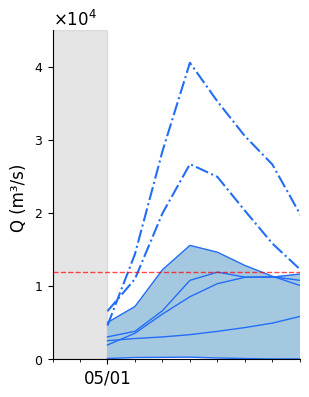

2024-05-02 00:00:00+00:00
                           dis24_station
2024-05-02 12:00:00+00:00   12512.836833
2024-05-03 12:00:00+00:00   23198.478833
2024-05-04 12:00:00+00:00   44413.122833
2024-05-05 12:00:00+00:00   46092.581083
2024-05-06 12:00:00+00:00   38034.654083


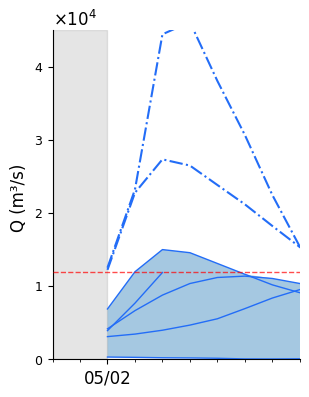

2024-05-03 00:00:00+00:00
                           dis24_station
2024-05-03 12:00:00+00:00   21528.465500
2024-05-04 12:00:00+00:00   38442.821583
2024-05-05 12:00:00+00:00   37676.276042
2024-05-06 12:00:00+00:00   29225.103417
2024-05-07 12:00:00+00:00   26831.220542


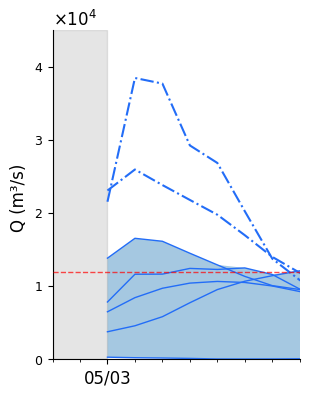

2024-05-04 00:00:00+00:00
                           dis24_station
2024-05-04 12:00:00+00:00   35604.844042
2024-05-05 12:00:00+00:00   32115.138333
2024-05-06 12:00:00+00:00   26559.859667
2024-05-07 12:00:00+00:00   26980.015000
2024-05-08 12:00:00+00:00   21902.978750


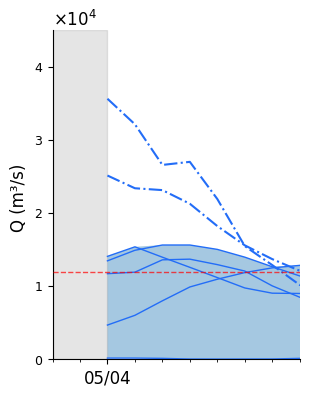

2024-05-05 00:00:00+00:00
                           dis24_station
2024-05-05 12:00:00+00:00   37376.058042
2024-05-06 12:00:00+00:00   29670.676958
2024-05-07 12:00:00+00:00   30223.348250
2024-05-08 12:00:00+00:00   24396.342875
2024-05-09 12:00:00+00:00   17879.817750


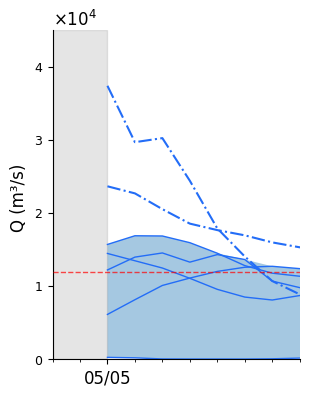

2024-05-06 00:00:00+00:00
2024-05-07 00:00:00+00:00
2024-05-08 00:00:00+00:00
2024-05-09 00:00:00+00:00
2024-05-10 00:00:00+00:00


In [43]:
# plot
n = 0

# Loop through all dates in the GloFAS data
for issued_date, glofas_data in processed_glofas.items():
    
    issued_date = issued_date.normalize()  # Normalize to midnight for date-only comparison
    print(issued_date)


    # Only process if issued_date is inside the interval
    if not (start_date <= issued_date <= end_date):
        continue

    n = n+1


    dis24_station_hype = read_dataset(processed_hype, issued_date, 'HYPE')
    dis24_station_geo = read_dataset(processed_geo, issued_date, 'GEO')
    dis24_station_google = read_dataset(processed_google, issued_date, 'Google')
    dis24_station_mgb = read_dataset(processed_mgb, issued_date, 'IPH MGB')
    dis24_station_hec = read_dataset(processed_hec, issued_date, 'IPH HEC')
    dis24_station_nasa = read_dataset(processed_nasa, issued_date, 'NASA')
    dis24_station_glofas = read_dataset(processed_glofas, issued_date, 'GloFAS')

    print(dis24_station_mgb.head())

    plt.figure(figsize=(xsize, ysize))

    mpl.rcParams.update({'font.size': 12})


    # Collect the plotted series first
    series_by_label = {}

    for label, data in [
        ('GloFAS EM', dis24_station_glofas),
        ('WWH D', dis24_station_hype),
        ('GEOGLOWS EM', dis24_station_geo),
        ('FloodHUb D', dis24_station_google),
        ('MGB D', dis24_station_mgb),
        ('GHI EM', dis24_station_nasa),
        ('MGB-HECRAS D', dis24_station_hec),
    ]:
        if not data.empty:
            s = data.squeeze()  # ensure Series
            series_by_label[label] = s

            if label in ('MGB D', 'MGB-HECRAS D'):
                plt.plot(s, label=label, color=colors[label], linewidth=1.5, linestyle='-.')
            else:
                plt.plot(s, label=label, color=colors[label], linewidth=1)

    # --- Build the envelope excluding MGB + MGB-HECRAS ---
    if series_by_label:
        df_all = pd.concat(series_by_label, axis=1)
        df_all.columns = df_all.columns.get_level_values(0)

        # Explicit exclusion of both
        exclude_labels = ['MGB D', 'MGB-HECRAS D']
        non_mgb_cols = [c for c in df_all.columns if c not in exclude_labels]

        df_non_mgb = df_all[non_mgb_cols].dropna(how='all')

        if not df_non_mgb.empty:
            y_min = df_non_mgb.min(axis=1, skipna=True)
            y_max = df_non_mgb.max(axis=1, skipna=True)

            valid = ~(y_min.isna() | y_max.isna())
            xi = y_min.index[valid]

            plt.fill_between(
                xi, y_min[valid].values, y_max[valid].values,
                alpha=0.4, label='Envelope (excl. MGB)', zorder=0
            )


    plt.plot(df_obs[name_data], color='black',linestyle='-',linewidth=2, label='Obs')
    
    # plt.xlabel('Date')
    plt.ylabel('Q (m³/s) ') # ,fontweight='bold'      x 10\u2074

    ax = plt.gca()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    issued_date = issued_date + timedelta(hours=12)
    
    plt.xlim(issued_date - timedelta(days=2), issued_date + timedelta(days=7))

    plt.ylim(x_inf, x_sup)

    plt.tight_layout()

    # plt.axvline(x=issued_date, color='grey', alpha = 0.7, label='Issued Date', linewidth = 1.5)

    plt.axvspan(
        issued_date - timedelta(days=2),   # left bound
        issued_date,                       # right bound
        color='grey', alpha=0.2, zorder=0
    )

    # plt.axhline(y=atencao_discharge, color='yellow', alpha = 0.5, label='Atenção', linewidth = 2, zorder = 0)
    # plt.axhline(y=alerta_discharge, color='orange', alpha = 0.5, label='Atenção', linewidth = 2, zorder = 0)
    plt.axhline(y=inunda_discharge, color='red', alpha = 0.7, label='Atenção', linewidth = 1, zorder = 3, linestyle='--')

    # plt.axhspan(
    #     inunda_discharge,   # left bound
    #     x_sup,                       # right bound
    #     color='red', alpha=0.08, zorder=0
    # )

    ax.set_xticks([issued_date])                         # one tick
    ax.set_xticklabels([issued_date.strftime('%m/%d')])  # how it looks
    ax.tick_params(axis='x', labelrotation=0)            # no rotation


    # ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=24))
    ax.tick_params(axis='x', rotation=0)
    ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5))  # at most 5 ticks

    ax.grid(False)

    # Use ScalarFormatter for scientific notation outside the axis
    formatter_y = mticker.ScalarFormatter(useMathText=True)
    formatter_y.set_scientific(True)
    formatter_y.set_powerlimits((0, 0))   # always scientific notation
    ax.yaxis.set_major_formatter(formatter_y)

    # Optional: force tick labels with 1 decimal
    for label in ax.get_yticklabels():
        label.set_fontsize(9)  # adjust font size if needed

    plt.savefig(f'Figures/{station_name}_forecast_{n}.png', dpi=300)
    plt.show()

In [44]:
  
n = 0
# Loop through all dates in the GloFAS data
for issued_date, glofas_data in processed_glofas.items():
    
    issued_date = issued_date.normalize()  # Normalize to midnight for date-only comparison
    print(f'Issue date: {issued_date}')

    # Only process if issued_date is inside the interval
    if not (start_date <= issued_date <= end_date):
        continue


    new_date_timestamp = issued_date.replace(hour=12)

    # Extract the corresponding observed value using the index from the forecast DataFrame
    obs_i = df_obs.loc[new_date_timestamp, 'discharge']
    print(obs_i)


    if not np.isnan(obs_i):

        n = n+1

        # Use the read_dataset function to handle each type of data
        dis24_station_hype = read_dataset(processed_hype, issued_date, 'HYPE')
        dis24_station_geo = read_dataset(processed_geo, issued_date, 'GEO')
        dis24_station_google = read_dataset(processed_google, issued_date, 'Google')
        dis24_station_mgb = read_dataset(processed_mgb, issued_date, 'IPH MGB')
        # dis24_station_hec = read_dataset(processed_hec, issued_date, 'IPH HEC')
        dis24_station_nasa = read_dataset(processed_nasa, issued_date, 'NASA')
        dis24_station_glofas = read_dataset(processed_glofas, issued_date, 'GloFAS')

        # Initialize all possible DataFrames as empty DataFrames with appropriate structure if necessary
        dis24_station_geo_nud = pd.DataFrame()
        dis24_station_google_nud = pd.DataFrame()
        dis24_station_mgb_nud = pd.DataFrame()
        # dis24_station_hec_nud = pd.DataFrame()
        dis24_station_nasa_nud = pd.DataFrame()
        dis24_station_glofas_nud = pd.DataFrame()
        dis24_station_hype_nud = pd.DataFrame()

        print(dis24_station_hype)

        # Your existing processing logic here
        if not dis24_station_hype.empty: dis24_station_hype_nud = post_process_constant(df_obs, dis24_station_hype, 'dis24_station')
        if not dis24_station_geo.empty: dis24_station_geo_nud = post_process_constant(df_obs, dis24_station_geo,'dis24_station')
        if not dis24_station_google.empty: dis24_station_google_nud = post_process_constant(df_obs, dis24_station_google,'dis24_station')
        if not dis24_station_mgb.empty: dis24_station_mgb_nud = post_process_constant(df_obs, dis24_station_mgb,'dis24_station')
        # if not dis24_station_hec.empty: dis24_station_hec_nud = post_process_constant(df_obs, dis24_station_hec)
        if not dis24_station_nasa.empty: dis24_station_nasa_nud = post_process_constant(df_obs, dis24_station_nasa,'dis24_station')
        if not dis24_station_glofas.empty: dis24_station_glofas_nud = post_process_constant(df_obs, dis24_station_glofas,'dis24_station')
        


        print(dis24_station_mgb.head())

        plt.figure(figsize=(xsize, ysize))

        mpl.rcParams.update({'font.size': 12})


        # Collect the plotted series first
        series_by_label = {}

        for label, data in [
            ('GloFAS EM', dis24_station_glofas_nud),
            ('WWH D', dis24_station_hype_nud),
            ('GEOGLOWS EM', dis24_station_geo_nud),
            ('FloodHUb D', dis24_station_google_nud),
            ('MGB D', dis24_station_mgb_nud),
            ('GHI EM', dis24_station_nasa_nud),
            # ('MGB-HECRAS D', dis24_station_hec),
        ]:
            if not data.empty:
                s = data.squeeze()  # ensure Series
                series_by_label[label] = s

                if label in ('MGB D', 'MGB-HECRAS D'):
                    plt.plot(s, label=label, color=colors[label], linewidth=1.5, linestyle='-.')
                else:
                    plt.plot(s, label=label, color=colors[label], linewidth=1)

        # --- Build the envelope excluding MGB + MGB-HECRAS ---
        if series_by_label:
            df_all = pd.concat(series_by_label, axis=1)
            df_all.columns = df_all.columns.get_level_values(0)

            # Explicit exclusion of both
            exclude_labels = ['MGB D', 'MGB-HECRAS D']
            non_mgb_cols = [c for c in df_all.columns if c not in exclude_labels]

            df_non_mgb = df_all[non_mgb_cols].dropna(how='all')
            
            if not df_non_mgb.empty:
                # Make sure the y's are numeric
                df_num = df_non_mgb.apply(pd.to_numeric, errors='coerce')
                y_min = df_num.min(axis=1, skipna=True)
                y_max = df_num.max(axis=1, skipna=True)

                valid = y_min.notna() & y_max.notna()

                # Convert tz-aware index -> UTC (or your chosen tz) -> tz-naive
                xi = y_min.index
                if getattr(xi, 'tz', None) is not None:
                    xi = xi.tz_convert('UTC').tz_localize(None)  # or use your local tz instead of 'UTC'

                # Plot
                plt.fill_between(
                    xi[valid],
                    y_min[valid].to_numpy(dtype=float),
                    y_max[valid].to_numpy(dtype=float),
                    alpha=0.4, label='Envelope (excl. MGB)', zorder=0
                )


        plt.plot(df_obs[name_data], color='black',linestyle='-',linewidth=2, label='Obs')
        
        # plt.xlabel('Date')
        plt.ylabel('Q (m³/s) ') # ,fontweight='bold'      x 10\u2074

        ax = plt.gca()

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)

        issued_date = issued_date + timedelta(hours=12)
        
        plt.xlim(issued_date - timedelta(days=2), issued_date + timedelta(days=7))

        plt.ylim(x_inf, x_sup)

        plt.tight_layout()

        # plt.axvline(x=issued_date, color='grey', alpha = 0.7, label='Issued Date', linewidth = 1.5)

        plt.axvspan(
            issued_date - timedelta(days=2),   # left bound
            issued_date,                       # right bound
            color='grey', alpha=0.2, zorder=0
        )

        # plt.axhline(y=atencao_discharge, color='yellow', alpha = 0.5, label='Atenção', linewidth = 2, zorder = 0)
        # plt.axhline(y=alerta_discharge, color='orange', alpha = 0.5, label='Atenção', linewidth = 2, zorder = 0)
        plt.axhline(y=inunda_discharge, color='red', alpha = 0.7, label='Atenção', linewidth = 1, zorder = 3, linestyle='--')

        # plt.axhspan(
        #     inunda_discharge,   # left bound
        #     x_sup,                       # right bound
        #     color='red', alpha=0.08, zorder=0
        # )

        ax.set_xticks([issued_date])                         # one tick
        ax.set_xticklabels([issued_date.strftime('%m/%d')])  # how it looks
        ax.tick_params(axis='x', labelrotation=0)            # no rotation

        # ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
        ax.xaxis.set_minor_locator(mdates.HourLocator(interval=24))
        ax.tick_params(axis='x', rotation=0)
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5))  # at most 5 ticks

        ax.grid(False)

        # Use ScalarFormatter for scientific notation outside the axis
        formatter_y = mticker.ScalarFormatter(useMathText=True)
        formatter_y.set_scientific(True)
        formatter_y.set_powerlimits((0, 0))   # always scientific notation
        ax.yaxis.set_major_formatter(formatter_y)

        # Optional: force tick labels with 1 decimal
        for label in ax.get_yticklabels():
            label.set_fontsize(9)  # adjust font size if needed

        plt.savefig(f'Figures/{station_name}_forecast_{n}_cons.png', dpi=300)
        plt.show()


Issue date: 2024-04-15 00:00:00+00:00
Issue date: 2024-04-16 00:00:00+00:00
Issue date: 2024-04-17 00:00:00+00:00
Issue date: 2024-04-18 00:00:00+00:00
Issue date: 2024-04-19 00:00:00+00:00
Issue date: 2024-04-20 00:00:00+00:00
Issue date: 2024-04-21 00:00:00+00:00
Issue date: 2024-04-22 00:00:00+00:00
Issue date: 2024-04-23 00:00:00+00:00
Issue date: 2024-04-24 00:00:00+00:00
Issue date: 2024-04-25 00:00:00+00:00
Issue date: 2024-04-26 00:00:00+00:00
Issue date: 2024-04-27 00:00:00+00:00
Issue date: 2024-04-28 00:00:00+00:00
Issue date: 2024-04-29 00:00:00+00:00
Issue date: 2024-04-30 00:00:00+00:00
Issue date: 2024-05-01 00:00:00+00:00
nan
Issue date: 2024-05-02 00:00:00+00:00
nan
Issue date: 2024-05-03 00:00:00+00:00
nan
Issue date: 2024-05-04 00:00:00+00:00


KeyError: Timestamp('2024-05-04 12:00:00+0000', tz='UTC')